## File handling - non-native files

This notebook discusses how load data and metadata from various non-py4DSTEM file formats.  It includes:

1. Default: reading with hyperspy
2. Memory mapping dm files
3. Reading empad files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import py4DSTEM
from py4DSTEM.file.readwrite import read

#### 1. Read with hyperspy

In [2]:
fp = "/home/ben/Data/20180830_zeltman_smallsampledatasets/1_10x10 ss=100 alpha=p48 spot 11 cl=1200 300kV RT bin=4 0p5sec.dm3"
datacube = read(fp)
datacube.set_scan_shape(10,10)

/home/ben/Data/20180830_zeltman_smallsampledatasets/1_10x10 ss=100 alpha=p48 spot 11 cl=1200 300kV RT bin=4 0p5sec.dm3 is not a py4DSTEM file.
Reading with hyperspy...
Reading with hyperspy...


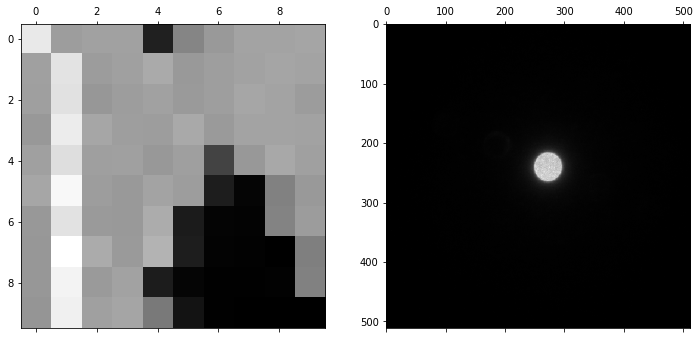

In [3]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.matshow(np.average(datacube.data4D,axis=(2,3)))
ax2.matshow(datacube.data4D[5,5,:,:])
plt.show()

#### 2. Memory-map a dm file 

In [4]:
fp = "/home/ben/Data/20190227_e_counting__AmSi_HamishBrown/Capture33.dm4"
datacube = read(fp, load='dmmmap')

/home/ben/Data/20190227_e_counting__AmSi_HamishBrown/Capture33.dm4 is not a py4DSTEM file.
Memory mapping a dm file...


In [5]:
datacube.data4D

memmap([[[[    0,     4,     0, ...,  9509,     0,     0],
          [    0,     1,     0, ...,    33,  8481,    39],
          [10023,    26,  6682, ...,    29,  7453,    26],
          ...,
          [   14,    16,    12, ...,    17,    18,    23],
          [   14,    16,    15, ...,    13,    12,    13],
          [   16,    11,    16, ...,    19,    14,    15]],

         [[   12,    16,    17, ...,    19,    14,    17],
          [   12,    16,    13, ...,    14,    14,    12],
          [   15,    13,    17, ...,    12,    20,    11],
          ...,
          [   13,    12,    15, ...,    12,    18,    15],
          [   13,    16,    13, ...,    18,    16,    18],
          [   14,    17,    12, ...,    12,    19,    10]],

         [[   15,    16,    17, ...,    19,    12,    16],
          [   13,    19,    17, ...,    14,    13,    13],
          [   17,    18,    17, ...,    10,    10,    15],
          ...,
          [   13,    13,    11, ...,    21,    13,    18],
       

#### 3. Read empad data

In [6]:
fp = "/home/ben/Data/20190409_PMNPT_RohanDhall/scan_3_x128_y128.raw"
datacube = read(fp, load='empad')
#datacube.swap_RQ()

/home/ben/Data/20190409_PMNPT_RohanDhall/scan_3_x128_y128.raw is not a py4DSTEM file.
Reading an EMPAD file...


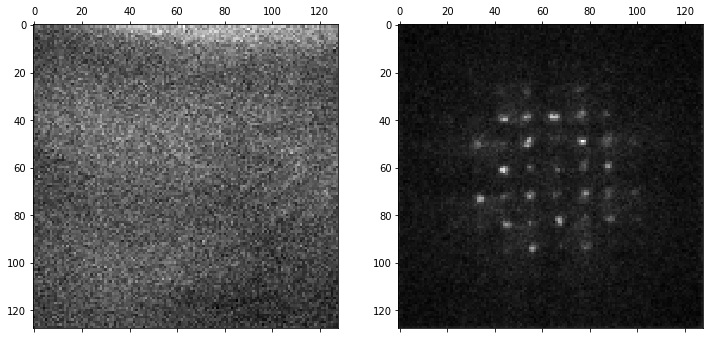

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))
ax1.matshow(np.average(datacube.data4D,axis=(0,1)))
ax1.matshow(datacube.data4D[:,:,50,50])
ax2.matshow(datacube.data4D[50,50,:128,:])
plt.show()